In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, random
import cv2
from sklearn.datasets import load_files

In [2]:
path_to_train_folder = os.path.join(os.path.pardir, "data", "train_images")
path_to_test_folder = os.path.join(os.path.pardir, "data", "test_images")
path_to_validation_folder = os.path.join(os.path.pardir, "data", "valid_images")

In [3]:
data = load_files(path_to_train_folder)
image_files = np.array(data['filenames'])

## Print a random photo from each class of each dataset

In [4]:
# take a random photo from each class
def random_photo_per_class(path):
    random.seed(22)
    random_images = []
    for root, dirs, files in os.walk(path):
        image = random.choice(os.listdir("{}".format(root)))
        random_images.append(str(root) + os.sep + str(image))
    return random_images

In [5]:
# print a random photo from each class
def printPhotosFromEachClass(examples):
    for image in examples:
        directory = os.path.dirname(image)
        doctype = directory.rsplit("\\", 1)[-1]
        img = cv2.imread(image, 0)

        equ = cv2.equalizeHist(img)
        res = np.hstack((img, equ))

        plt.subplot(111)
        plt.imshow(res, cmap="Greys_r")
        plt.title("{}".format(doctype))
        plt.xticks([])
        plt.yticks([])

        plt.show()

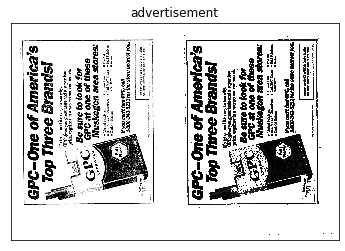

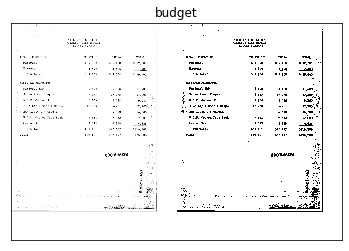

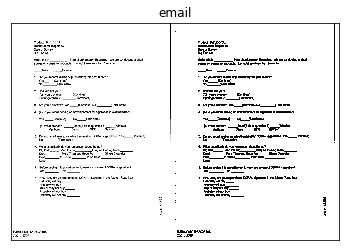

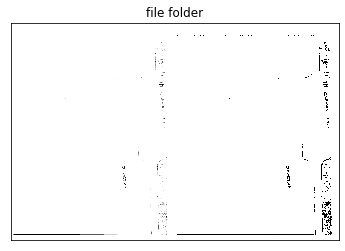

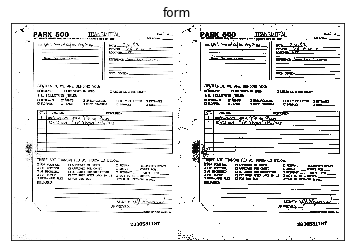

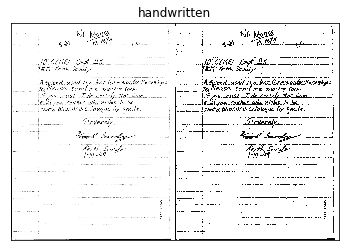

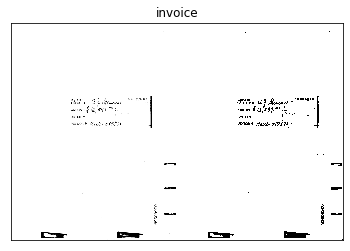

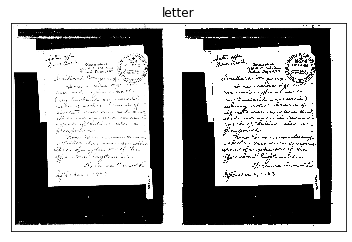

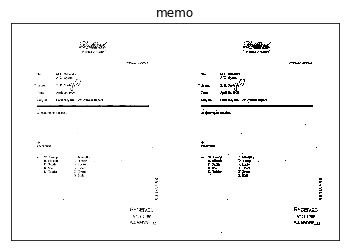

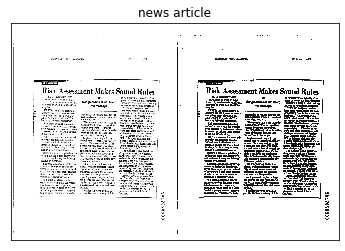

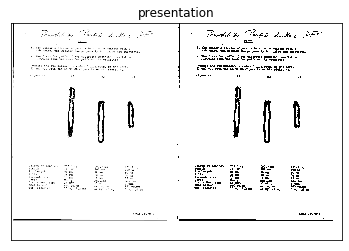

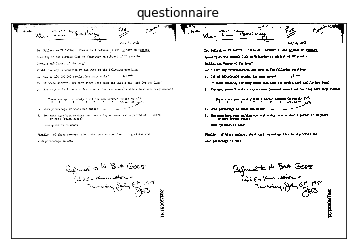

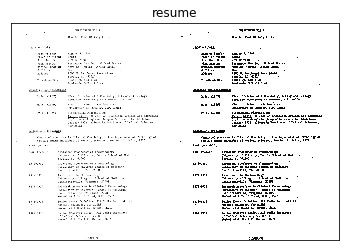

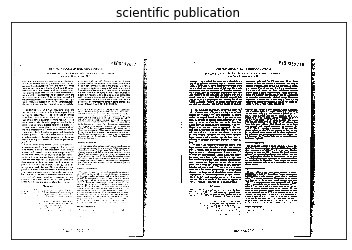

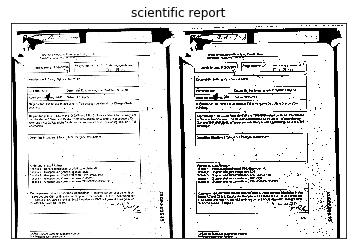

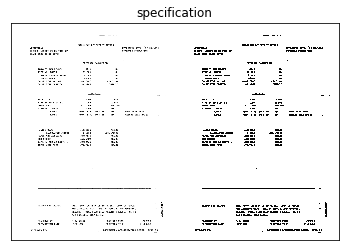

In [6]:
examples = random_photo_per_class(path_to_train_folder)[1:]
printPhotosFromEachClass(examples)

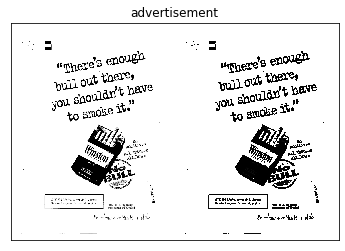

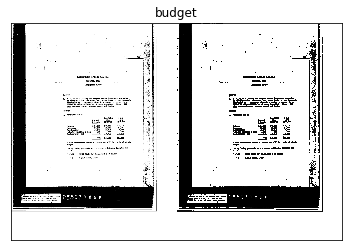

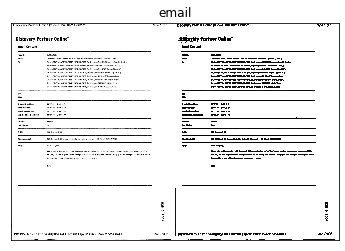

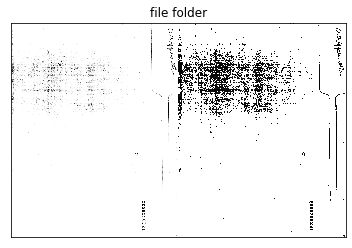

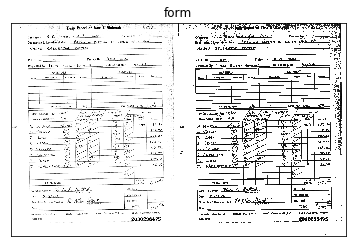

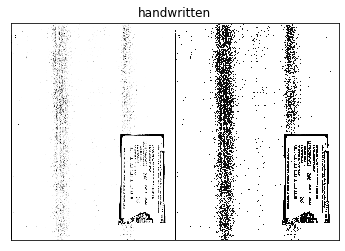

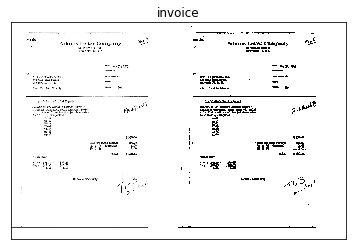

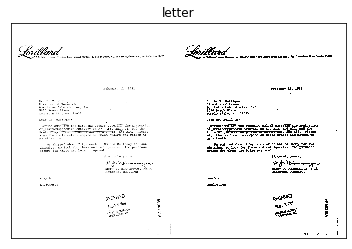

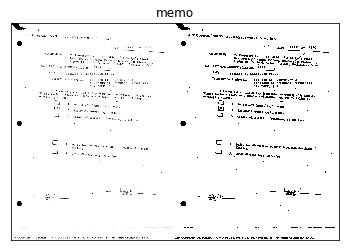

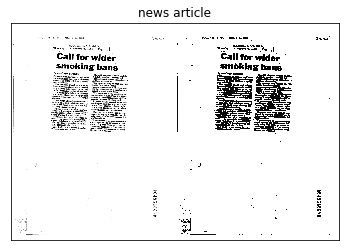

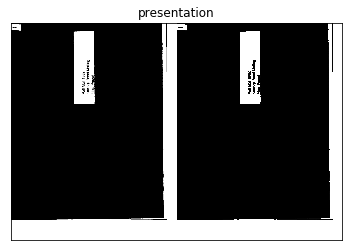

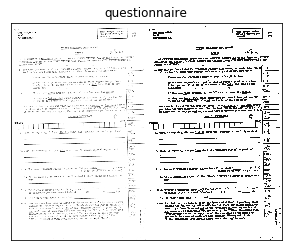

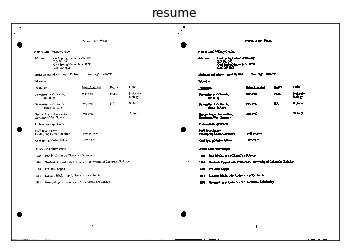

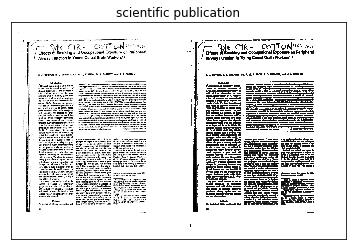

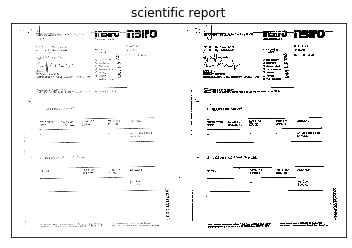

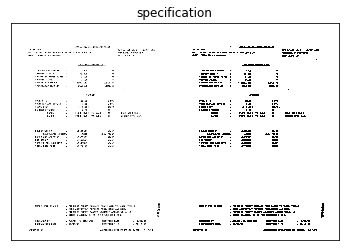

In [7]:
examples = random_photo_per_class(path_to_test_folder)[1:]
printPhotosFromEachClass(examples)

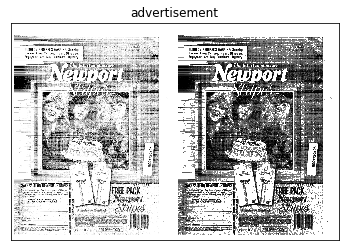

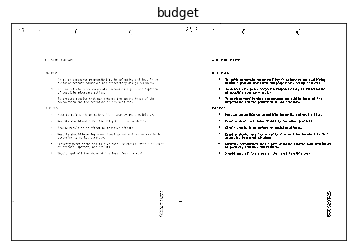

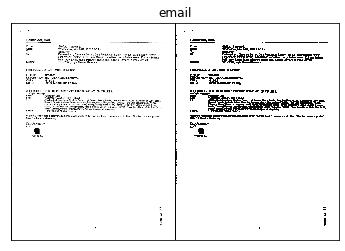

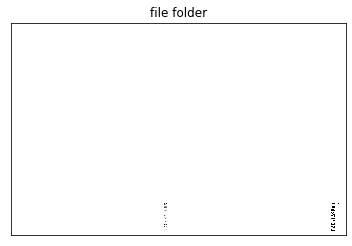

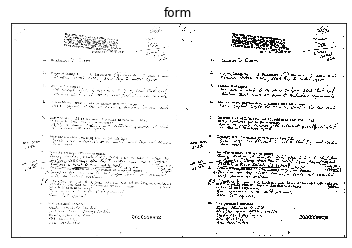

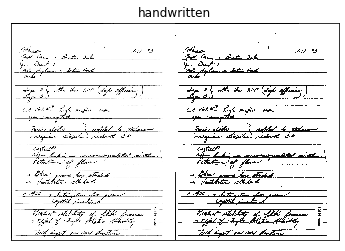

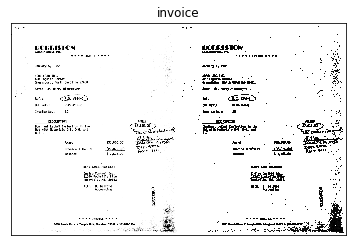

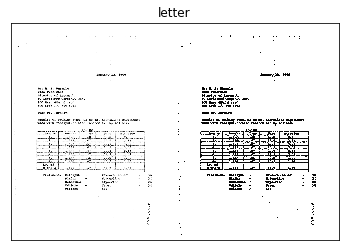

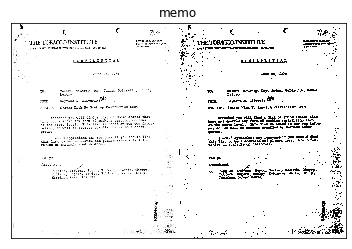

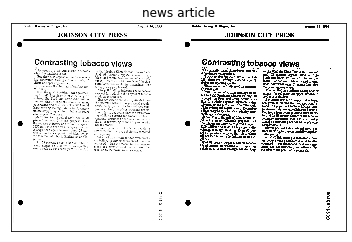

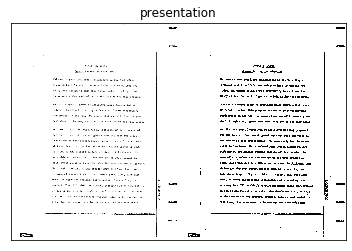

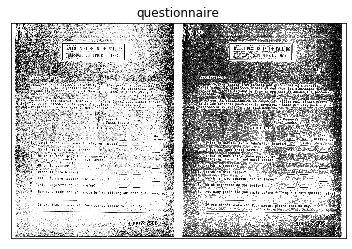

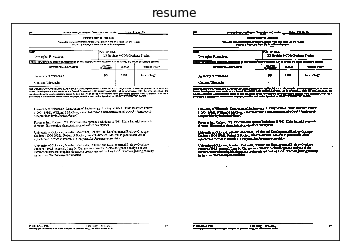

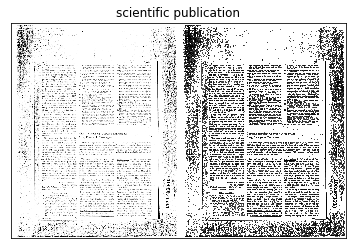

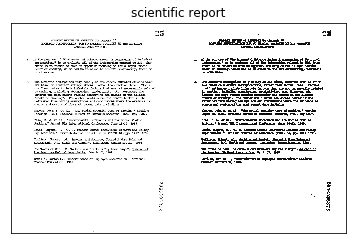

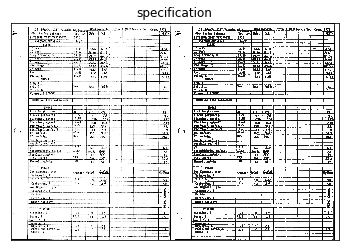

In [8]:
examples = random_photo_per_class(path_to_validation_folder)[1:]
printPhotosFromEachClass(examples)

## Plot mean pixel values

In [9]:
#Getting mean pixel value of each image
pixel_means = []

for image in image_files:
    img = cv2.imread(image)
    pixel_mean = np.mean(np.array(img))
    pixel_means.append(pixel_mean)

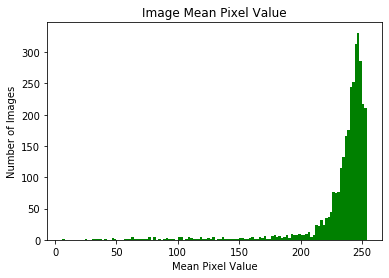

In [10]:
pixel_means_int = [int(x) for x in pixel_means]
plt.hist(pixel_means, bins = range(min(pixel_means_int), max(pixel_means_int) + 2, 2), color = 'green')
plt.title('Image Mean Pixel Value')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Number of Images')
plt.show()

Observation: most images are mainly white with some black writing; but there are also images that are mostly black.

## Identifying the images with highest (whitest) and lowest (blackest) mean pixel values

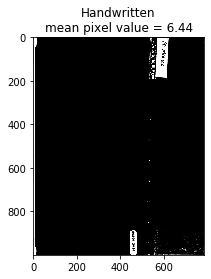

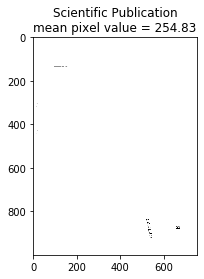

In [11]:
max_index = pixel_means.index(max(pixel_means))
min_index = pixel_means.index(min(pixel_means))
max_image = image_files[max_index]
min_image = image_files[min_index]
max_img = cv2.imread(max_image, 0)
min_img = cv2.imread(min_image, 0)
max_path = os.path.dirname(max_image)
min_path = os.path.dirname(min_image)
max_doctype = max_path.split('\\')[3]
min_doctype = min_path.split('\\')[3]
plt.imshow(min_img, cmap = 'gray')
plt.title(min_doctype.title() + "\nmean pixel value = {}".format(min(pixel_means).round(2)))
plt.show()
plt.imshow(max_img, cmap = 'gray')
plt.title(max_doctype.title() + "\nmean pixel value = {}".format(max(pixel_means).round(2)))
plt.show()

In [30]:
def getBlackImages(pixel_mean):
    black_image_list = []
    for x in pixel_means:
        if x < pixel_mean:
            black_image_list.append(os.path.dirname(image_files[ pixel_means.index(x)]))
    return black_image_list

In [31]:
# images with mean pixel value less than 100, grouped by category
df = pd.DataFrame(getBlackImages(100), columns =['path'])
df.groupby('path').size()

path
..\data\train_images\advertisement        12
..\data\train_images\budget                1
..\data\train_images\file folder          27
..\data\train_images\handwritten           2
..\data\train_images\letter                1
..\data\train_images\presentation          1
..\data\train_images\questionnaire         2
..\data\train_images\scientific report     2
dtype: int64

In [35]:
# images with mean pixel value less than 180, grouped by category
df = pd.DataFrame(getBlackImages(180), columns =['path'])
df.groupby('path').size()

path
..\data\train_images\advertisement             72
..\data\train_images\budget                     3
..\data\train_images\file folder               48
..\data\train_images\handwritten                5
..\data\train_images\invoice                    3
..\data\train_images\letter                     2
..\data\train_images\news article               5
..\data\train_images\presentation               2
..\data\train_images\questionnaire              3
..\data\train_images\scientific publication     2
..\data\train_images\scientific report          2
..\data\train_images\specification              1
dtype: int64

Observation: 
- almost all advertisments are very dark colored
- a lot of file folders are very dark
- allother typpes of documents are mostly white